In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/sales_data_with_discounts.csv')
df.head(5)

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [3]:
numerical_columns = df.select_dtypes(include='number').columns


In [5]:
# Calculate statistics
stats = df[numerical_columns].agg(['mean', 'median', lambda x: x.mode()[0], 'std'])
stats.index = ['Mean', 'Median', 'Mode', 'Standard Deviation']


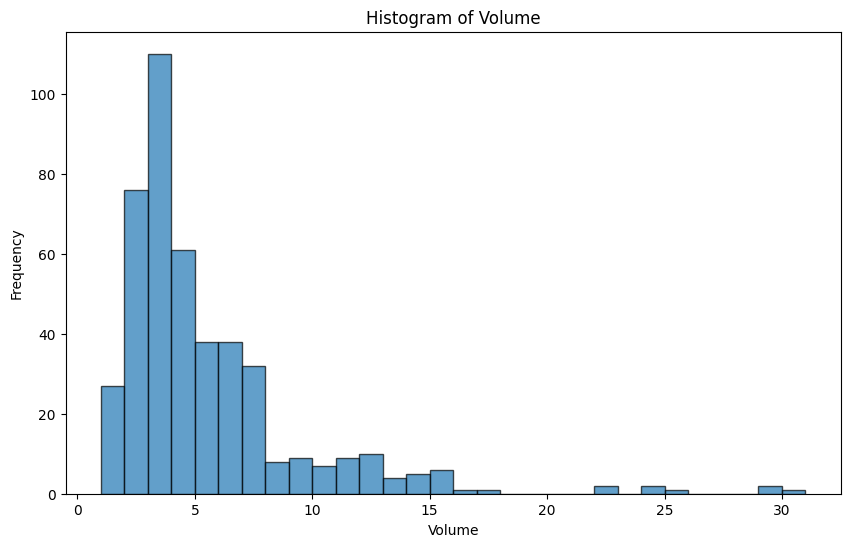

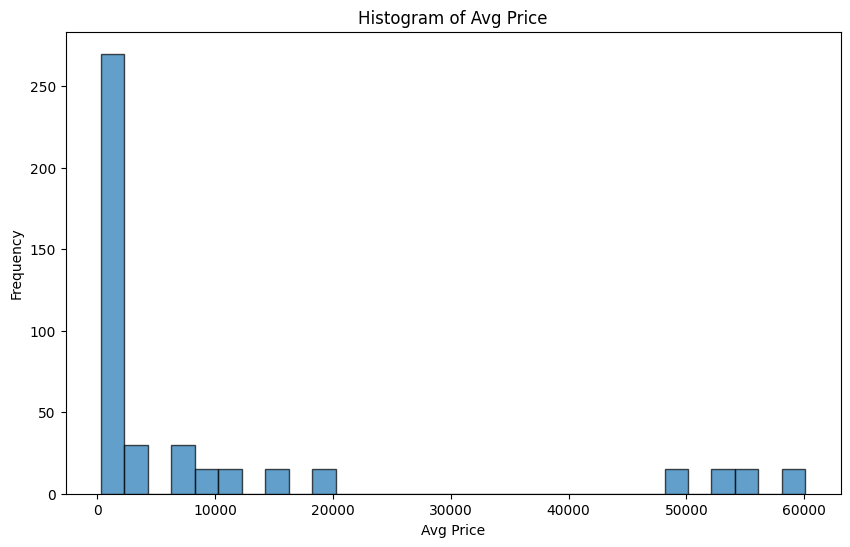

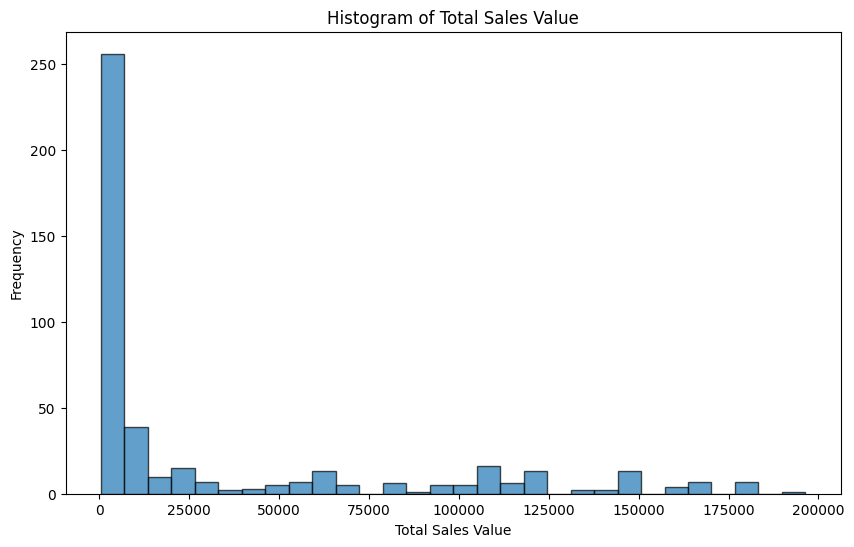

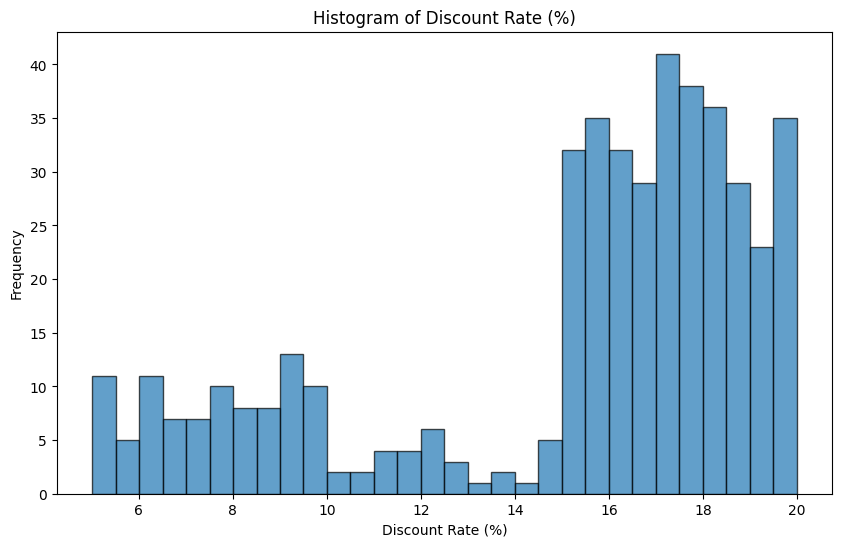

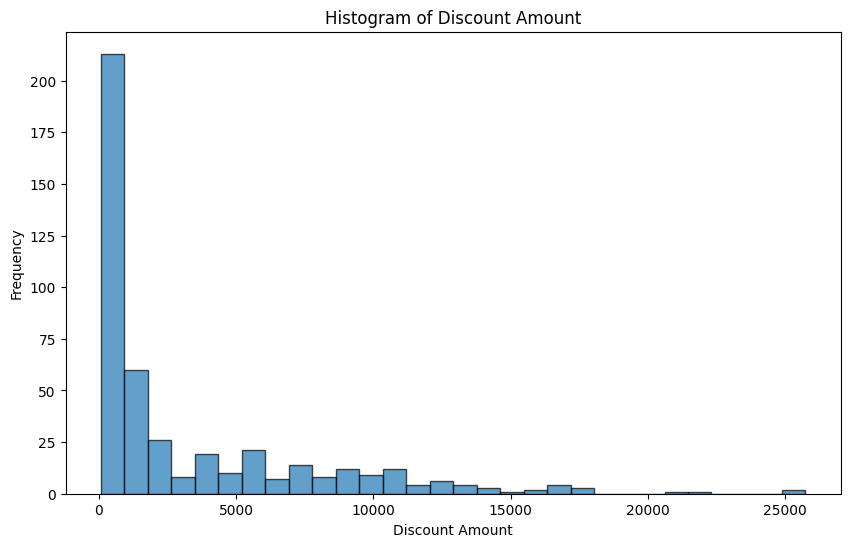

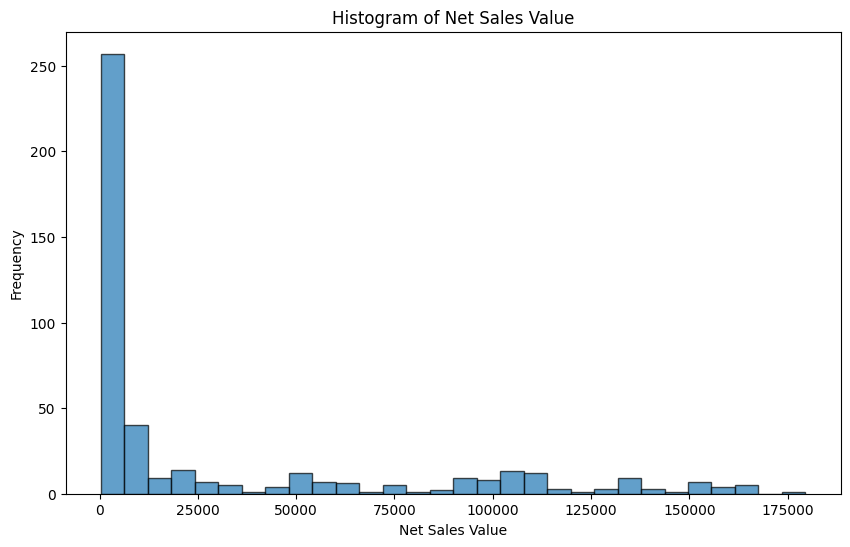

In [6]:
import matplotlib.pyplot as plt

# Plot histograms
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[col], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


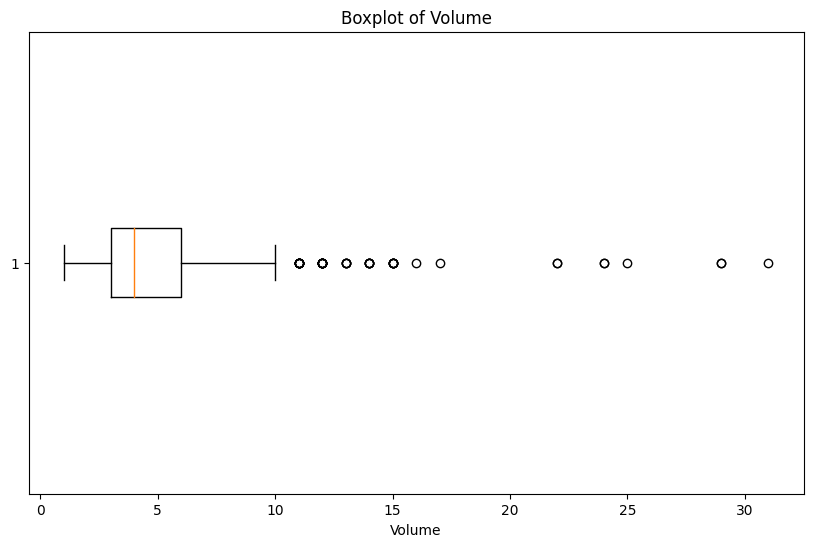

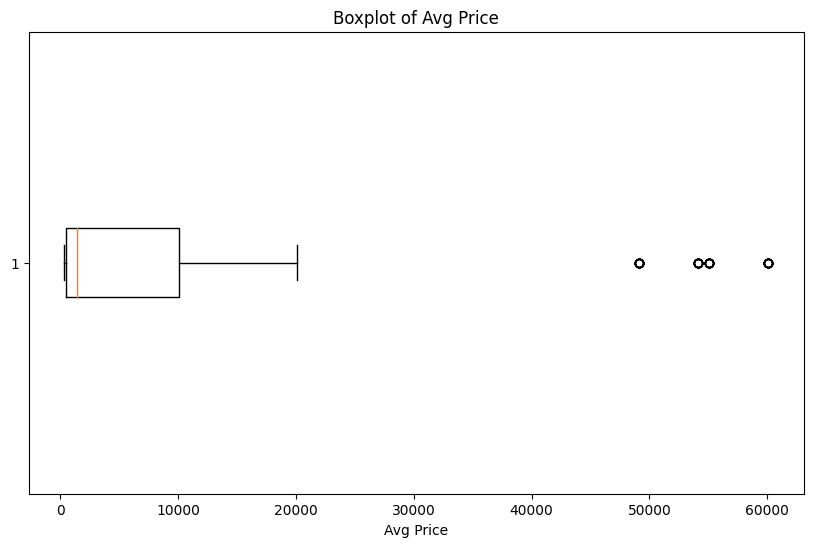

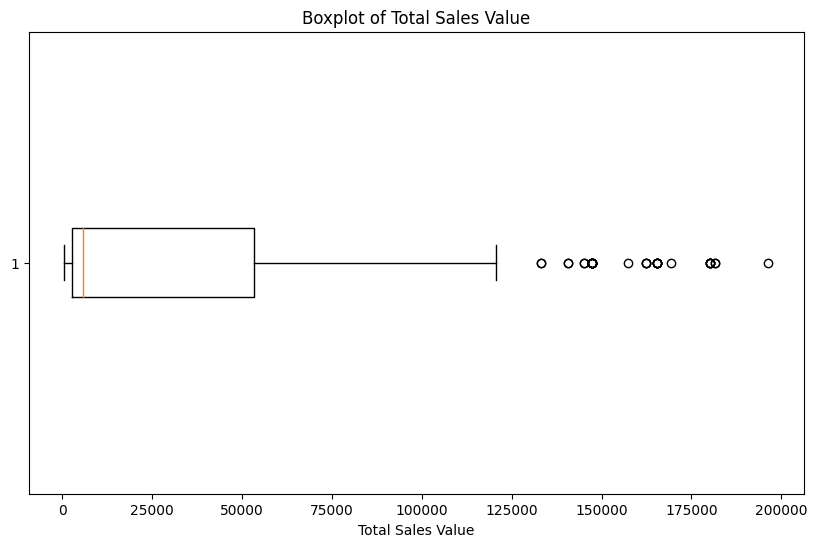

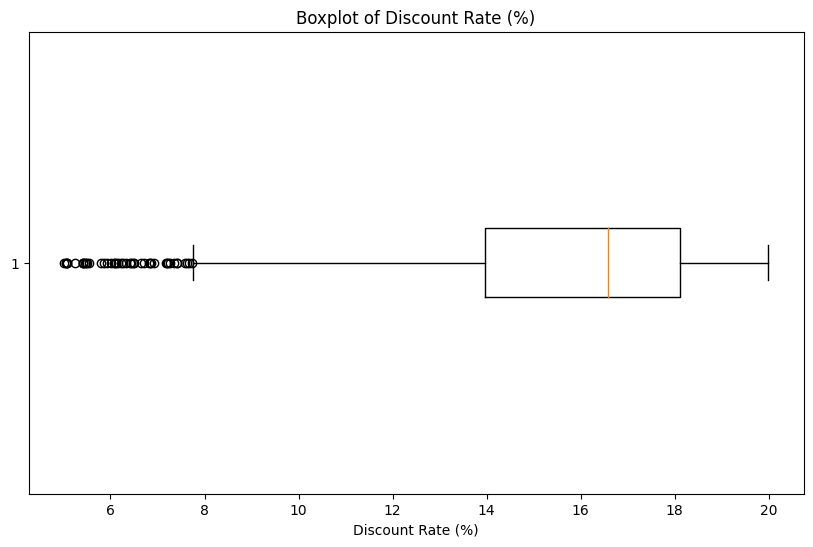

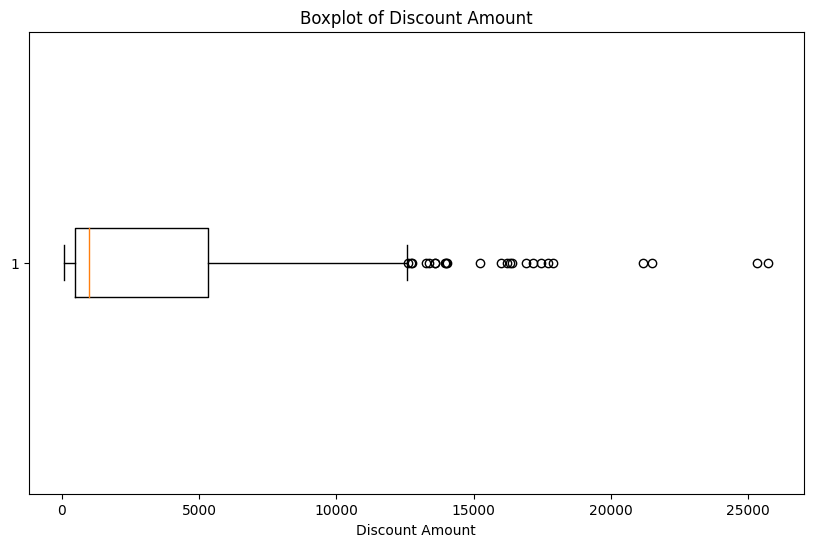

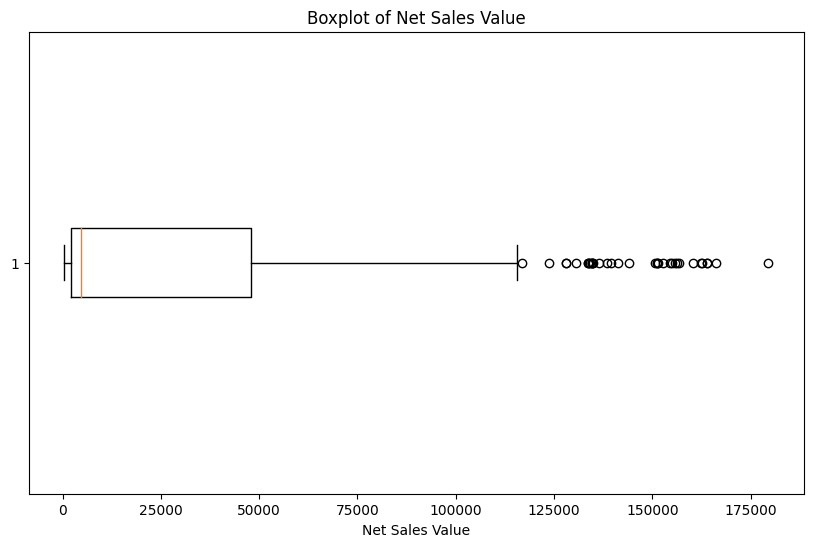

In [7]:
# Plot boxplots
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


In [8]:
categorical_columns = df.select_dtypes(include='object').columns


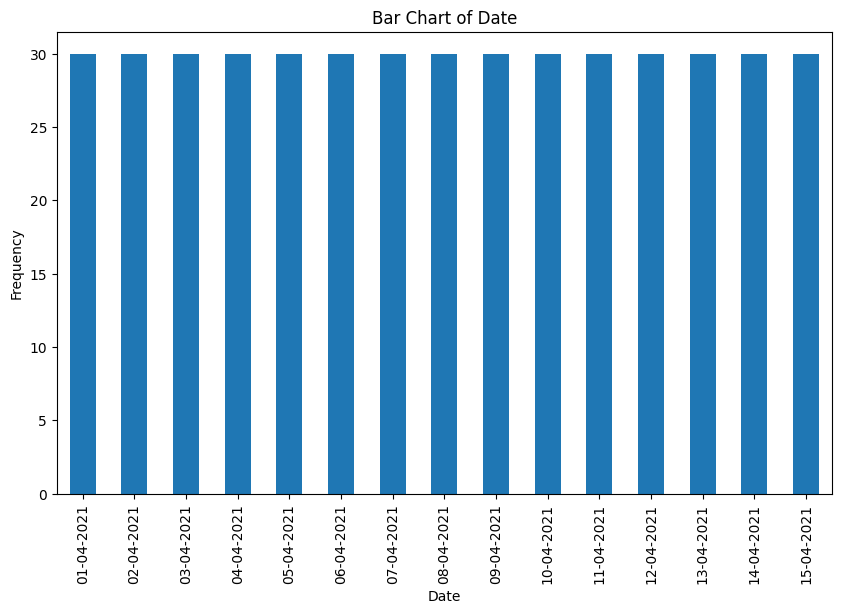

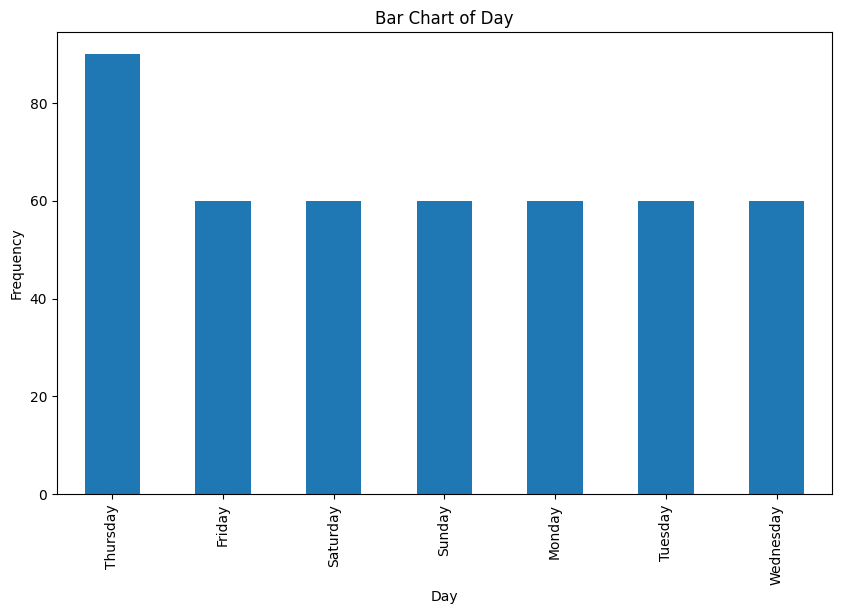

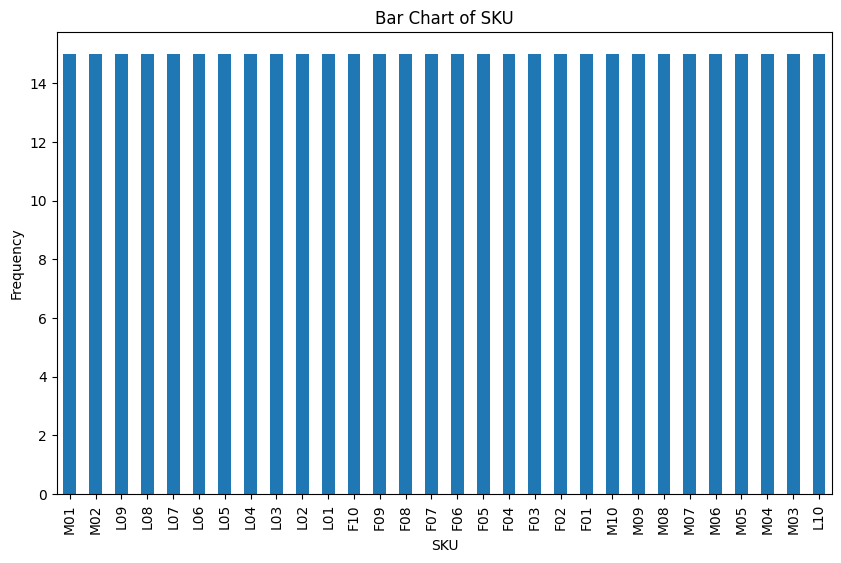

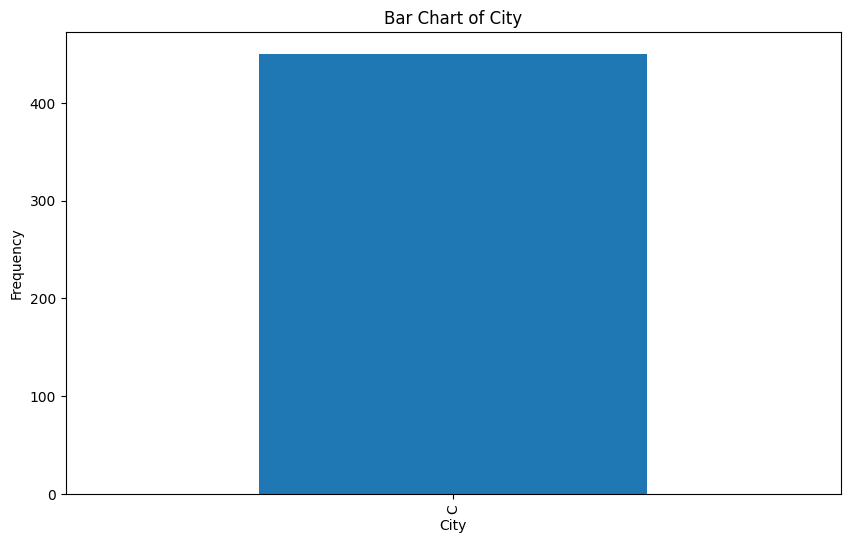

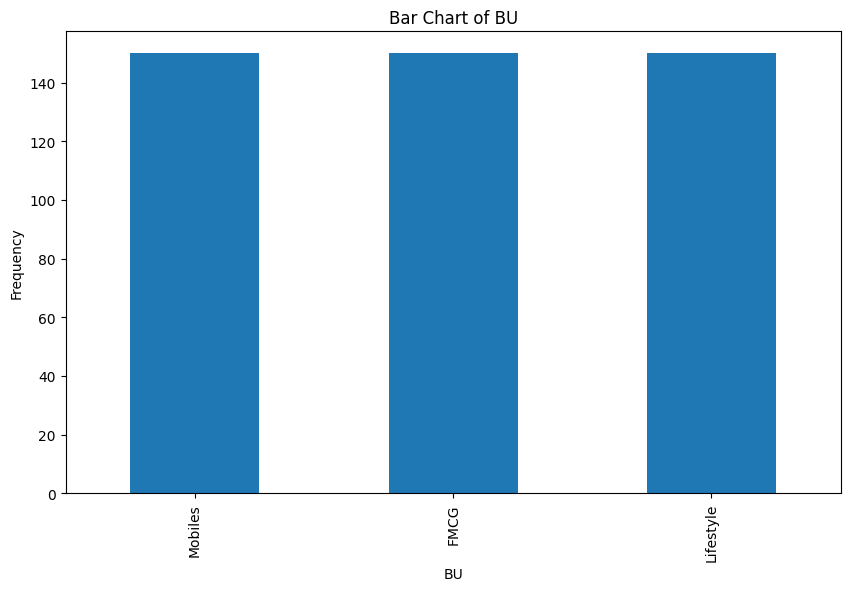

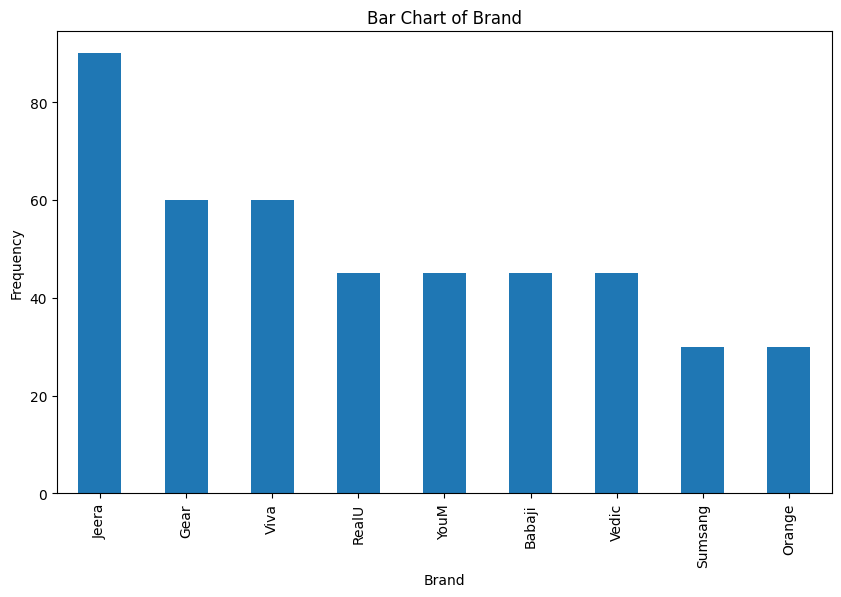

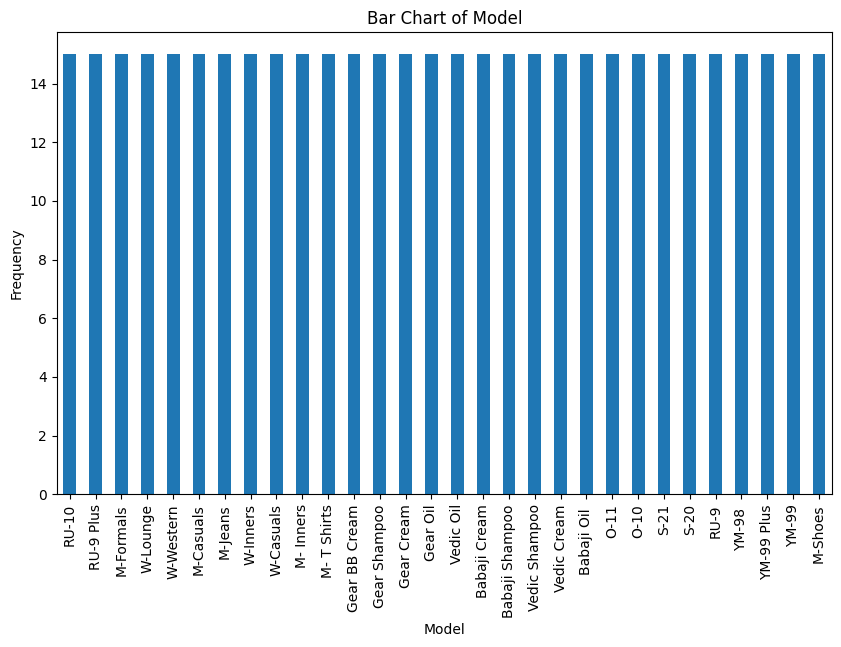

In [9]:
# Plot bar charts
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [11]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply standardization
df_standardized = df.copy()
df_standardized[numerical_columns] = scaler.fit_transform(df[numerical_columns])


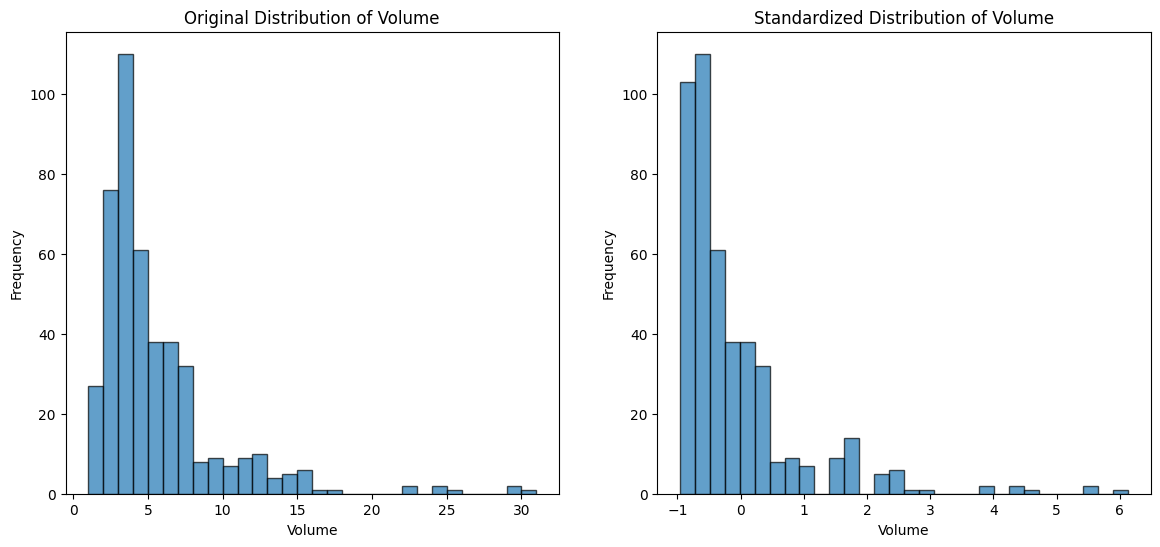

In [13]:
# Plot before and after comparison for a sample column
sample_col = numerical_columns[0]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df[sample_col], bins=30, edgecolor='k', alpha=0.7)
plt.title(f'Original Distribution of {sample_col}')
plt.xlabel(sample_col)
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_standardized[sample_col], bins=30, edgecolor='k', alpha=0.7)
plt.title(f'Standardized Distribution of {sample_col}')
plt.xlabel(sample_col)
plt.ylabel('Frequency')

plt.show()


In [14]:
# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)


In [15]:
# Display a portion of the transformed dataset
df_encoded.head()


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
